## Import packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
parent_dir = Path.cwd().parent.parent.parent

"""
This code is used for Fig2.B. Distributional changes of each county’s population- and facility-based accessibility.  
Data: (1) U.S. Boundaries, (2) Population- and facility-based accessibility.
"""

'\nThis code is used for Fig2.B. Distributional changes of each county’s population- and facility-based accessibility.  \nData: (1) U.S. Boundaries, (2) Population- and facility-based accessibility.\n'

## Data Processing

In [2]:
def load_and_prepare_data(parent_dir):
    """
    Load and prepare EVSE data for analysis.
    """
    # Read Accessibility
    evse_file = Path.cwd() / 'M2SFCA_population-based-Acc.csv'
    result_population = pd.read_csv(evse_file).reset_index(drop=True)

    evse_file = Path.cwd() / 'M2SFCA_facility-based-Acc.csv'
    result_facility = pd.read_csv(evse_file).reset_index(drop=True)
    
    return result_population, result_facility

## Mapping and Visualization

In [3]:
def plot_accessibility_boxplot(all_data, lim_x, lim_y, ylabel=r'$\bf{Pop.-based\ Acc.}$'):
    """
    Create a grouped boxplot showing accessibility distribution by year and EVSE type.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Set Seaborn theme and style
    sns.set_theme(style="whitegrid", palette="Set2")
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Define custom color palette
    custom_palette = ["brown", "#84BA42", "teal", "#682487"]
    
    # Create grouped boxplot
    sns.boxplot(
        x='Year', 
        y='Accessibility', 
        hue='EVSE_Type',
        data=all_data, 
        palette=custom_palette,
        width=0.7,
        linewidth=0.5,
        dodge=True,
        gap=0.2,
        flierprops={
            'marker': 'o',
            'markerfacecolor': 'lightgrey',
            'markeredgecolor': 'lightgrey',
            'markersize': 1
        },
        medianprops={'color': 'white', 'linewidth': 1.5},
        ax=ax
    )
    
    # Add grid lines (horizontal only)
    ax.grid(True, linestyle='--', alpha=0.6, axis='y')
    
    # Set labels and scale
    ax.set_yscale('log')
    ax.set_xlabel(r'$\bf{Year}$', fontsize=17, linespacing=1.2)
    ax.set_ylabel(ylabel, fontsize=17, linespacing=1.1)
    
    # Format x-axis tick labels
    ax.set_xticklabels([tick.get_text().replace('Year', '') for tick in ax.get_xticklabels()])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    
    # Configure legend
    ax.legend(title='EVSE Type', title_fontsize=12, fontsize=12, 
              bbox_to_anchor=(1.01, 0.01), loc='lower left', borderaxespad=0.)
    
    # Set axis limits
    ax.set_ylim(lim_x,lim_y)
    ax.set_xlim(-0.7, 10.7)
    
    plt.tight_layout()
    return fig, ax

## Test run

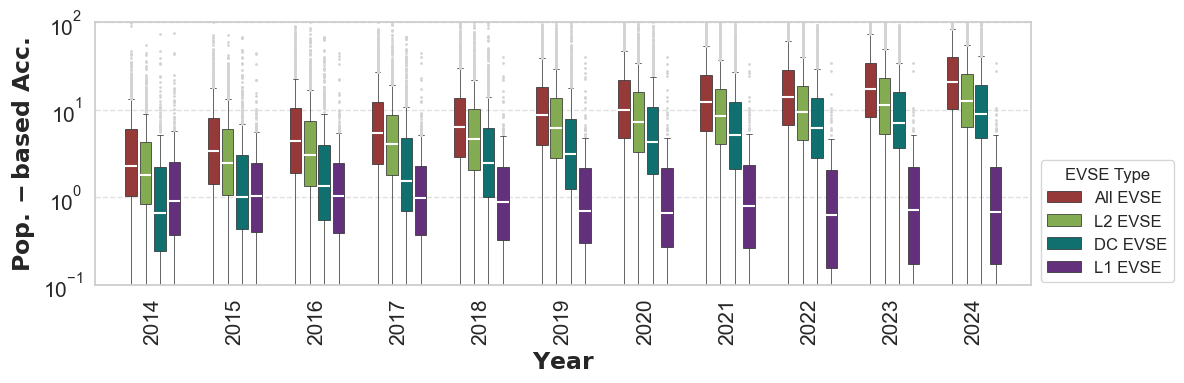

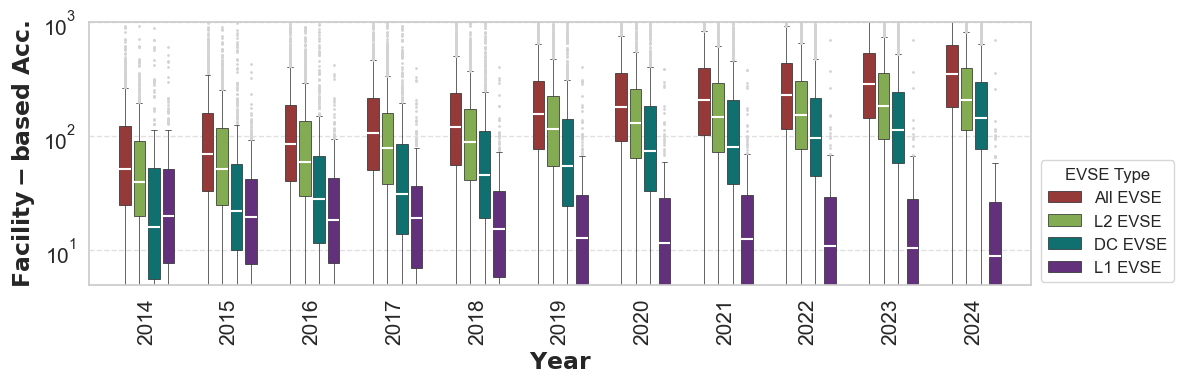

In [4]:
# Usage example:
if __name__ == "__main__":

    result_population, result_facility = load_and_prepare_data(parent_dir)
    
    # Main execution - Create accessibility boxplot
    fig, ax = plot_accessibility_boxplot(result_population, ylabel=r'$\bf{Pop.-based\ Acc.}$', lim_x = 0.1, lim_y = 100)
    plt.show()

    fig, ax = plot_accessibility_boxplot(result_facility, ylabel=r'$\bf{Facility-based\ Acc.}$',lim_x = 5, lim_y = 1000)
    plt.show()